In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
n, p = 100, .5
s1 = np.random.binomial(n, p, 1000)
s2 = np.random.binomial(n, p, 10)
p = np.random.chisquare(10,10)

In [126]:
np.argsort([80,98,49,34,76,53,65,16,27])
# np.bincount([0, 1, 2, 2, 3, 3 , 5, 5, 6, 6, 6])
# np.argmax()

array([7, 8, 3, 2, 5, 6, 4, 0, 1])

<AxesSubplot:ylabel='Count'>

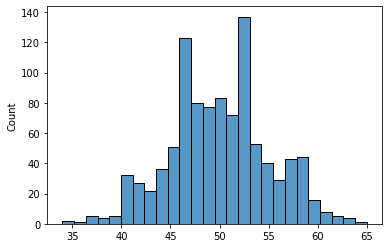

In [4]:
sns.histplot(data=s1)

In [127]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        
        y_pred = [self._get_single_prediction(x_test_row) for x_test_row in X_test]
        print(y_pred)
#         print(len(y_pred))
#         print("\n")
        return np.array(y_pred)

    def _get_single_prediction(self, x_test_row):
        distances = [self._get_euclidean_distance(x_test_row, x_train_row) 
                 for x_train_row in self.X_train]
        
        
        k_idx = np.argsort(distances)[:self.k]
        
#         print(k_idx)
        k_labels = [self.y_train[idx] for idx in k_idx]
#         print([distances[idx] for idx in k_idx])
#         print(k_labels)
#         print(np.bincount(k_labels))
#         print(np.argmax(np.bincount(k_labels)))
#         print(k_labels)
        return np.argmax(np.bincount(k_labels))

    def _get_euclidean_distance(self, x1, x2):
        dist = np.sum((x1 - x2)**2)
        return np.sqrt(dist)

In [128]:
from sklearn import datasets
from sklearn.model_selection import KFold

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target
# print(X)
# print(y)
scores = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [129]:
#Sem o kfold
def run(X, y):
    #Elbow method
    l_results = []
#     for i in range(3, 30, 1): 
    i = 3
#     for fold, (idx_train, idx_valid) in enumerate(cv.split(X)):

    X_train, y_train = X[0:119], y[0:119]
    X_valid, y_valid = X[119:], y[119:]

    k = i
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_valid)

    score = accuracy(y_valid, predictions)
    scores.append(score)

#     m_score = np.mean(scores)
#     l_results.append([i, m_score])
#     print(f"Mean Accuracy: {m_score}")
#     return l_results

In [130]:
# def run(X, y):
#     #Elbow method
#     l_results = []
# #     for i in range(3, 30, 1): 
#     i = 3
#     for fold, (idx_train, idx_valid) in enumerate(cv.split(X)):

#         X_train, y_train = X[idx_train], y[idx_train]
#         X_valid, y_valid = X[idx_valid], y[idx_valid]

#         k = i
#         clf = KNN(k=k)
#         clf.fit(X_train, y_train)
#         predictions = clf.predict(X_valid)

#         score = accuracy(y_valid, predictions)
#         scores.append(score)

#     m_score = np.mean(scores)
#     l_results.append([i, m_score])
#     print(f"Mean Accuracy: {m_score}")
#     return l_results

In [131]:
run(X, y)

[1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1]


In [12]:
resultado = pd.DataFrame(run(X, y), columns=['nK','score'])

Mean Accuracy: 0.9600000000000002
Mean Accuracy: 0.9566666666666667
Mean Accuracy: 0.9555555555555556
Mean Accuracy: 0.9549999999999997
Mean Accuracy: 0.956
Mean Accuracy: 0.9577777777777777
Mean Accuracy: 0.9590476190476191
Mean Accuracy: 0.96
Mean Accuracy: 0.9607407407407408
Mean Accuracy: 0.9613333333333334
Mean Accuracy: 0.9618181818181819
Mean Accuracy: 0.9616666666666668
Mean Accuracy: 0.9615384615384616
Mean Accuracy: 0.9609523809523809
Mean Accuracy: 0.9608888888888888
Mean Accuracy: 0.9608333333333334
Mean Accuracy: 0.9607843137254902
Mean Accuracy: 0.9607407407407408
Mean Accuracy: 0.960701754385965
Mean Accuracy: 0.9610000000000002
Mean Accuracy: 0.960952380952381
Mean Accuracy: 0.9603030303030303
Mean Accuracy: 0.9597101449275363
Mean Accuracy: 0.9591666666666667
Mean Accuracy: 0.9586666666666669
Mean Accuracy: 0.9579487179487179
Mean Accuracy: 0.9570370370370371


<AxesSubplot:>

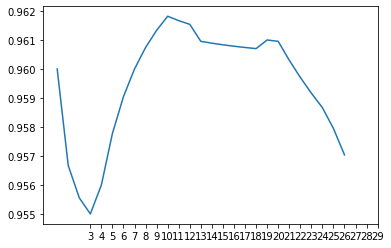

In [13]:
resultado.score.plot(xticks=resultado.nK)

In [14]:
data = pd.DataFrame(X, columns=["feat1", "feat2", "feat3", "feat4"])

In [15]:
data["target"] = y

In [16]:
data.head()

,feat1,feat2,feat3,feat4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='feat2', ylabel='feat4'>

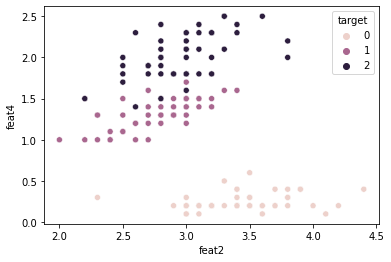

In [17]:
sns.scatterplot(data=data, x="feat2", y="feat4", hue="target")

In [18]:
data2 = pd.read_csv("data/top50.csv", encoding="latin1")

In [19]:
data2.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [20]:
X = data2[["Beats.Per.Minute", "Energy", "Danceability", "Loudness..dB..", "Liveness", "Valence.", "Length.", "Acousticness..", "Speechiness."]].values
y = np.array([x[0] for x in data2[["Popularity"]].values])


In [21]:
l_results = run(X, y)

Mean Accuracy: 0.925
Mean Accuracy: 0.8931034482758621
Mean Accuracy: 0.8640000000000001
Mean Accuracy: 0.8374193548387098
Mean Accuracy: 0.8125
Mean Accuracy: 0.7915151515151516
Mean Accuracy: 0.7711764705882355
Mean Accuracy: 0.7514285714285714
Mean Accuracy: 0.7327777777777779
Mean Accuracy: 0.714054054054054
Mean Accuracy: 0.6963157894736842
Mean Accuracy: 0.6800000000000002
Mean Accuracy: 0.6645
Mean Accuracy: 0.6497560975609757
Mean Accuracy: 0.6347619047619049
Mean Accuracy: 0.6204651162790698
Mean Accuracy: 0.6077272727272727
Mean Accuracy: 0.5960000000000001
Mean Accuracy: 0.5847826086956524
Mean Accuracy: 0.574468085106383
Mean Accuracy: 0.5637500000000001
Mean Accuracy: 0.5538775510204083
Mean Accuracy: 0.5444000000000001
Mean Accuracy: 0.5352941176470588
Mean Accuracy: 0.5269230769230769
Mean Accuracy: 0.5181132075471698
Mean Accuracy: 0.5096296296296297


In [22]:
resultado = pd.DataFrame(l_results, columns=['nK','score'])

<AxesSubplot:>

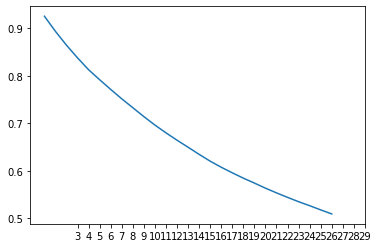

In [23]:
resultado.score.plot(xticks=resultado.nK)

In [24]:
data = pd.DataFrame(X, columns=["feat1", "feat2", "feat3", "feat4", "feat5", "feat6", "feat7", "feat8", "feat9"])
# data["target"] = y

In [25]:
data2.corr()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Unnamed: 0,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,0.270659,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,0.137329,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.065844,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.015993,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,-0.257506,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553


### Scaling pra ver se melhora o score

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X = scaler.fit_transform(X)

In [28]:
l_results = run(X, y)

Mean Accuracy: 0.5007272727272727
Mean Accuracy: 0.49178571428571427
Mean Accuracy: 0.4842105263157895
Mean Accuracy: 0.476551724137931
Mean Accuracy: 0.4691525423728814
Mean Accuracy: 0.4623333333333333
Mean Accuracy: 0.4557377049180328
Mean Accuracy: 0.44935483870967735
Mean Accuracy: 0.44349206349206344
Mean Accuracy: 0.4378125
Mean Accuracy: 0.4323076923076923
Mean Accuracy: 0.426969696969697
Mean Accuracy: 0.422089552238806
Mean Accuracy: 0.4176470588235295
Mean Accuracy: 0.4130434782608696
Mean Accuracy: 0.4088571428571429
Mean Accuracy: 0.4047887323943662
Mean Accuracy: 0.4005555555555555
Mean Accuracy: 0.39643835616438355
Mean Accuracy: 0.39216216216216215
Mean Accuracy: 0.388
Mean Accuracy: 0.38394736842105265
Mean Accuracy: 0.37974025974025977
Mean Accuracy: 0.3758974358974359
Mean Accuracy: 0.3721518987341772
Mean Accuracy: 0.3685
Mean Accuracy: 0.3649382716049383


## Piorou :/